# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [44]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [46]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 36.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 28.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 45.7MB/s]


In [47]:
data = pd.read_csv('./train.csv')

In [48]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

### 1) Смотрим на некоторые строки датасета

In [49]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1246,21,54.60,1125.2,Male,0,Yes,No,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),0
1002,52,83.80,4331.4,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),0
3724,72,25.65,1887,Female,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
4090,10,19.50,225.85,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
2208,46,54.35,2460.15,Female,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Two year,No,Credit card (automatic),1
1648,3,81.35,233.7,Male,1,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1
647,62,24.25,1424.6,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
566,56,44.85,2564.95,Female,0,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),0
2535,5,96.50,492.55,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),1
255,13,19.45,232.1,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [51]:
data.isna().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


### 2) Как видим - нам повезло с данными и у нас нет пропущенных значений

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### 1) Проведем экспресс анализ

In [52]:
data['TotalSpent'][pd.to_numeric(data['TotalSpent'], errors='coerce').isna()]

,TotalSpent
1048,
1707,
2543,
3078,
3697,
4002,
4326,
4551,
4598,


Все же мы нашли пустые значения в датасете, но они не совсем Nan - переведем столбец в числовые значения, а так как пусстоты мало то заменим на среднее

In [53]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
data['TotalSpent'] = data['TotalSpent'].fillna(data['TotalSpent'].mean())

Распределение числовых данных

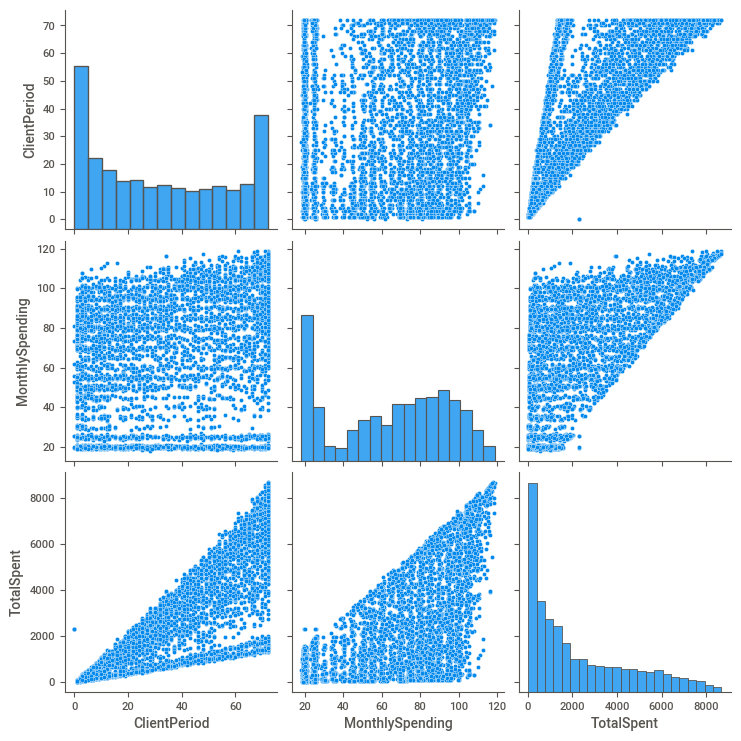

In [54]:
import seaborn as sns

sns.pairplot(data[num_cols], x_vars=num_cols, y_vars=num_cols,kind='scatter', diag_kind='hist')
plt.show()

Как мы видим, у нас явно прослеживается положительная зависимости между Total spending и остальынми метриками - в целом это логично, так длительность и месячные затраты нарямую влияют на совокупные расходы

Помимо этого, период людей распределен равномерно - однако есть много "новых пользователей" и "много старых пользователей", может говорить о том, что компания за короткий период недавно привлекла много юзеров - даже больше чем на старте

Ежемесячные раходы распределены нормально около среднего 80, но также присутствует большой пик в районе 20 - кажется здесь хорошо можно делить людей на группы бедных и богатых

Суммарные расходы смещены к началу - в целом логично, так как много новых пользователей


Интересно что есть выбор - точка на где Total spending значительный у новго пользователя

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

Давайте уберем точкb с выбросами

In [55]:
data[(data['TotalSpent'] > 2000) & (data['ClientPeriod'] < 1)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,2291.390461,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,2291.390461,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,2291.390461,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,2291.390461,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,2291.390461,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,2291.390461,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,2291.390461,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,2291.390461,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,2291.390461,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [56]:
data.drop(index=data[(data['TotalSpent'] > 2000) & (data['ClientPeriod'] < 1)].index, inplace=True)

Теперь категориальные признаки

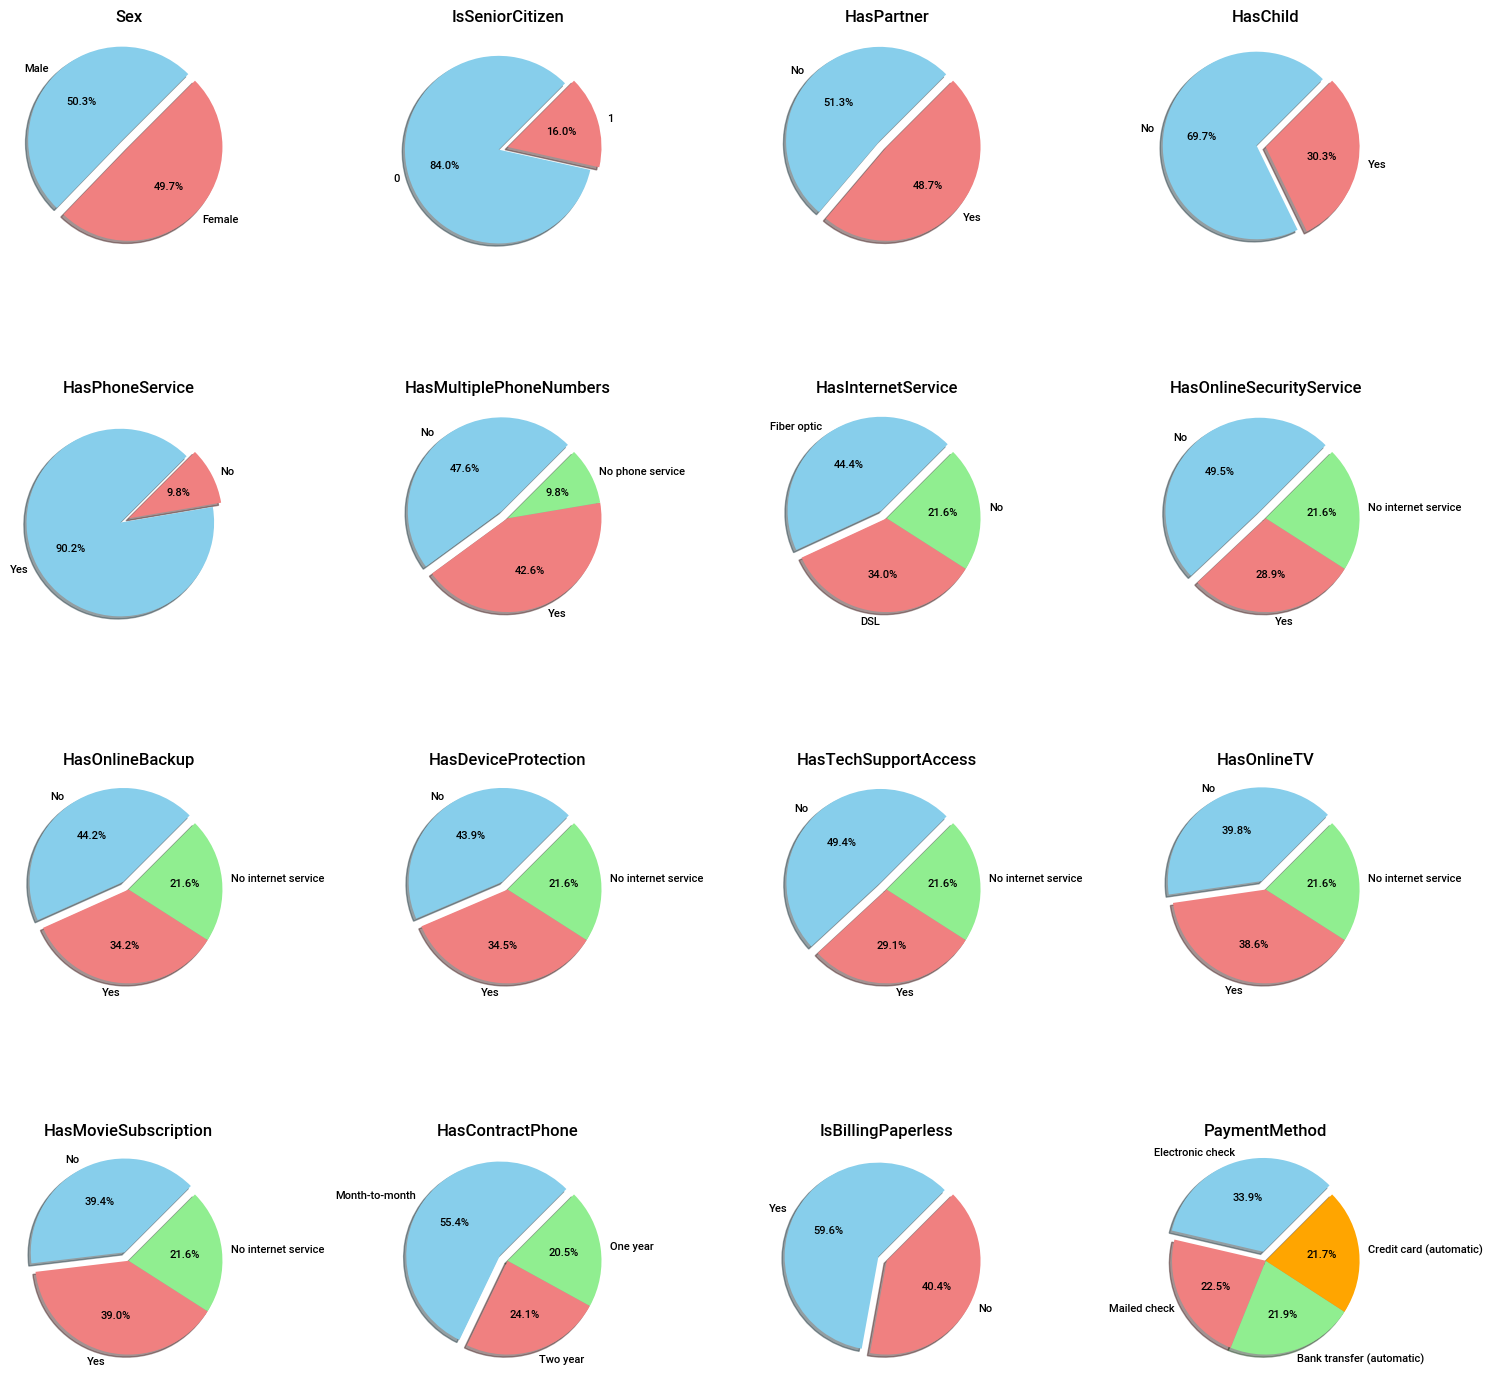

In [57]:
from os import name
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(15, 15))

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i, j]
        # Get the values for the current category
        values = data[cat_cols[i*4 + j]].value_counts()

        # Adjust explode to match the number of values
        explode = [0.1] + [0] * (len(values) - 1)

        # Plotting the pie chart
        values.plot(
            kind='pie',
            ax=ax,
            title=cat_cols[i*4 + j],
            autopct='%1.1f%%',
            startangle=45,
            colors=['skyblue', 'lightcoral', 'lightgreen', 'orange'], # Add more colors if needed
            shadow=True,
            explode=explode,
            radius=1,
            textprops={'fontsize': 8}
        )
        ax.set_ylabel('')

plt.tight_layout()
plt.show()

Целевая перменная

В целом можно сказать, что ни у одного признака нет критически малого количества какого-то из значений - 10 % вполне неплохое количество при 3 значениях, также вид оплаты имеет 4 значения и распределены они примерно одинаково

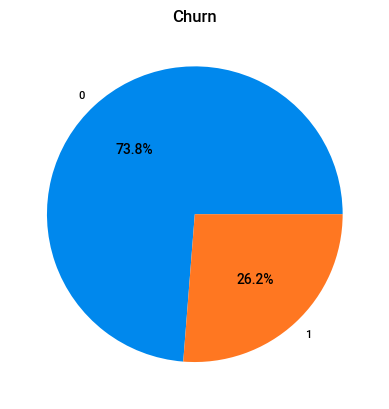

In [58]:
data['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Churn')
plt.ylabel('')
plt.show()

В целом есть дисбаланс, он не сильный - с этим вполне возможно работать

Можно использовать интересную библиотеку и быстро провести анализ с ее помощью - она также дает дополнительную информацию

In [59]:
!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)


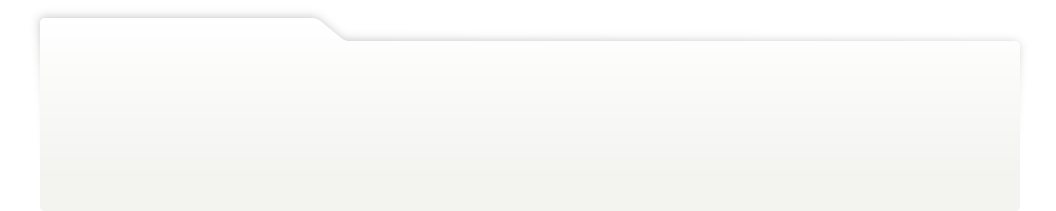
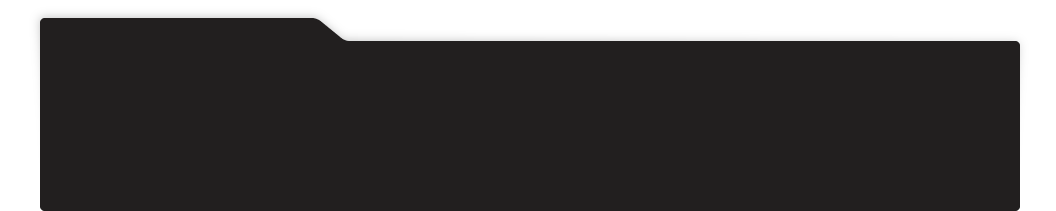
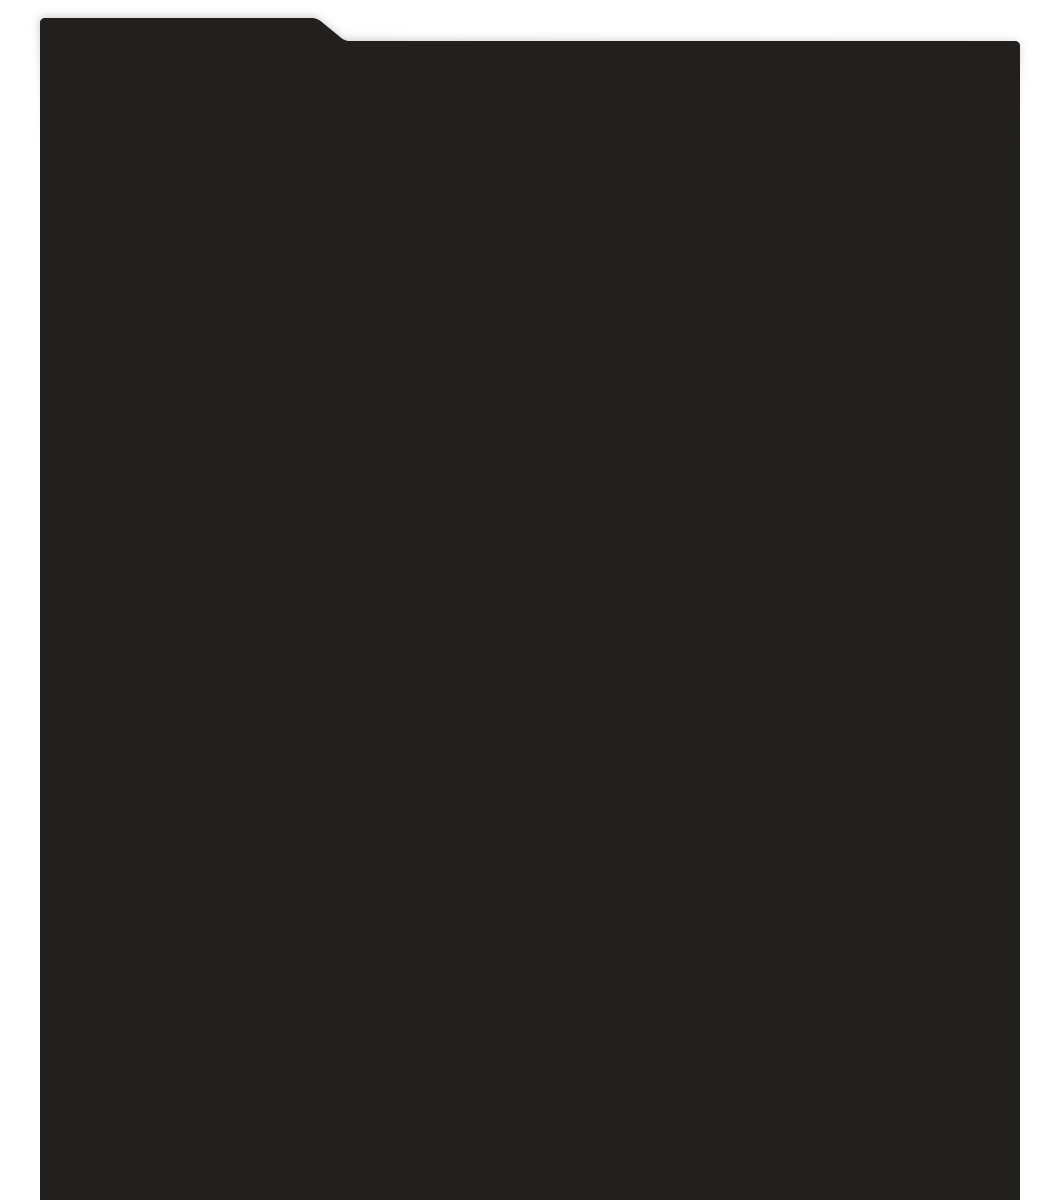
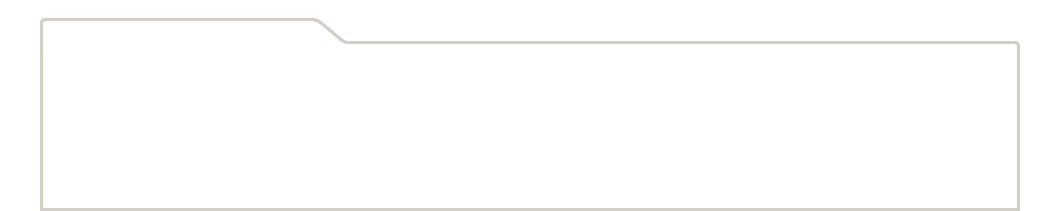
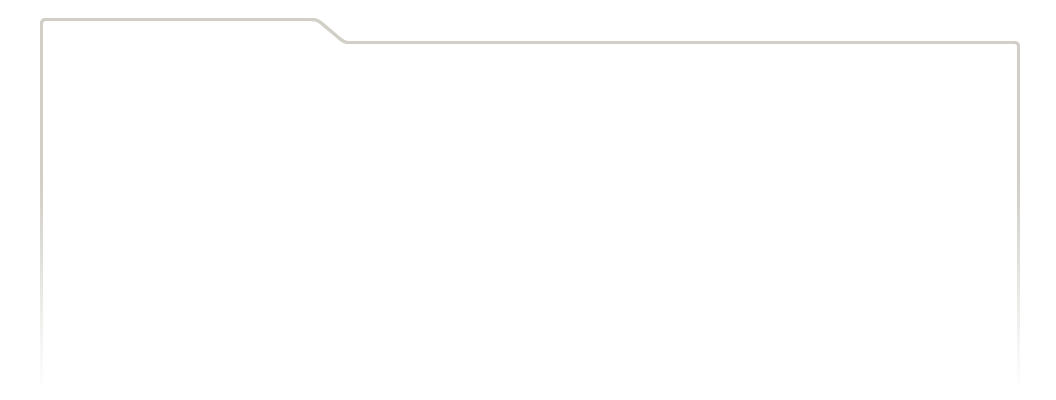
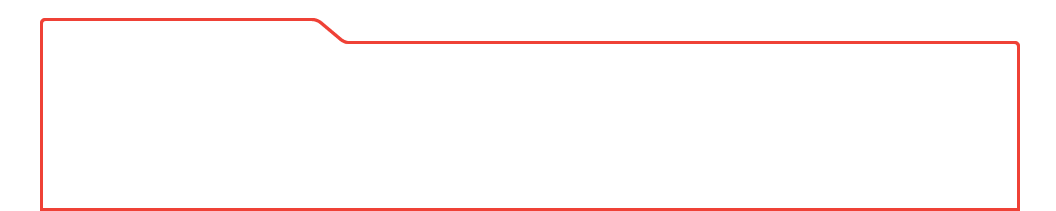
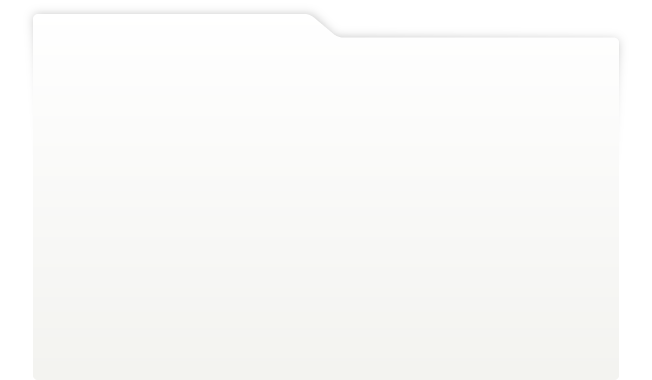
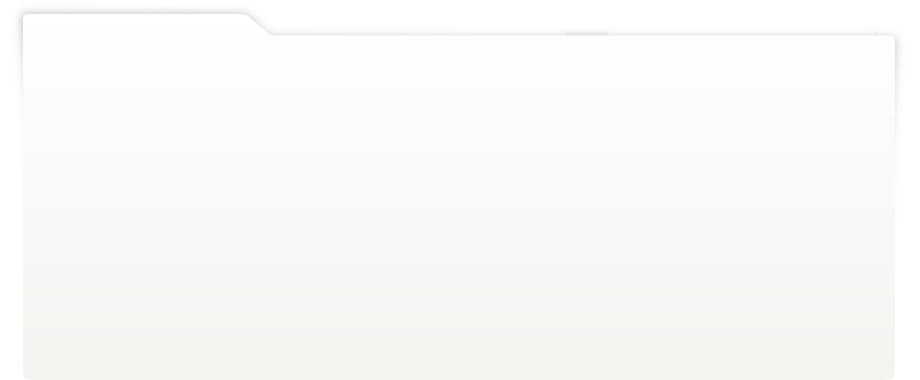
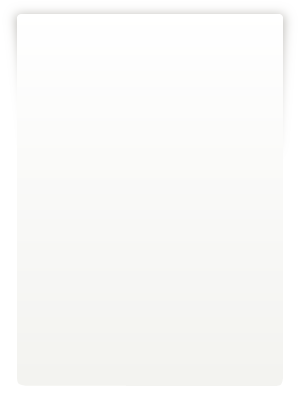
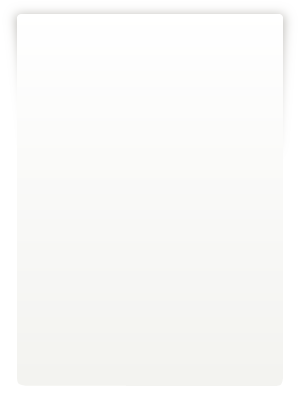
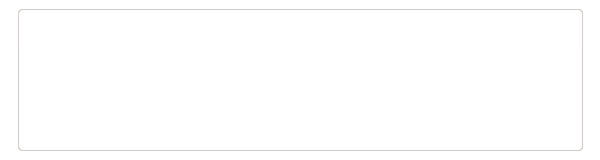
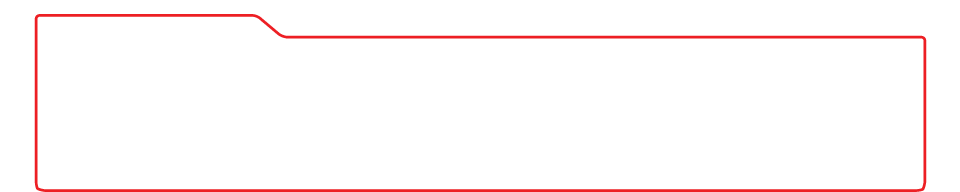
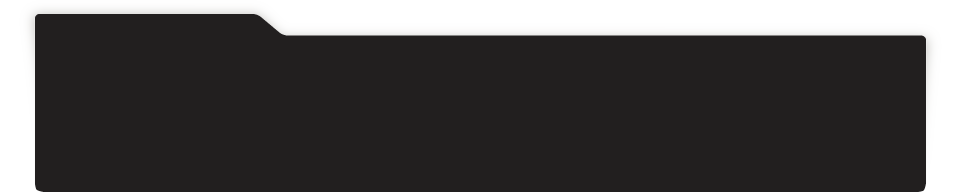
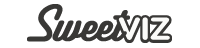
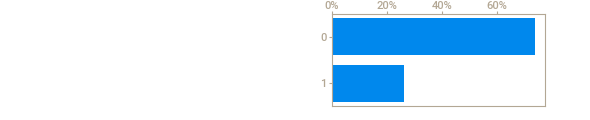
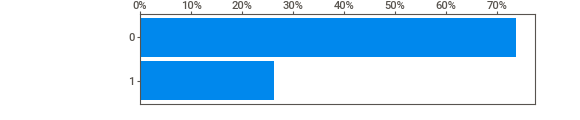
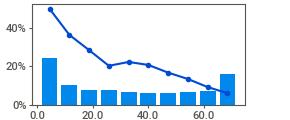
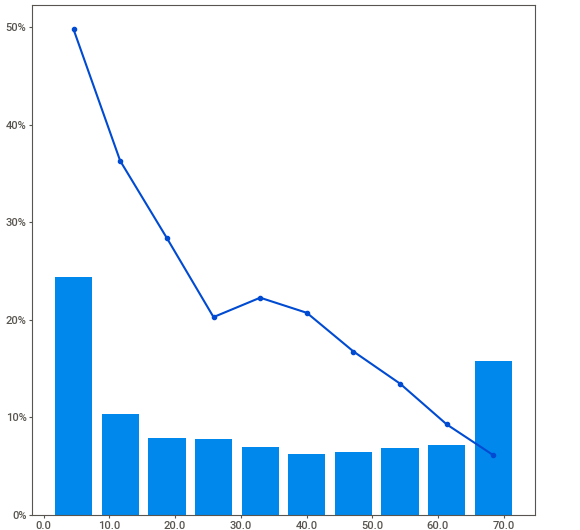
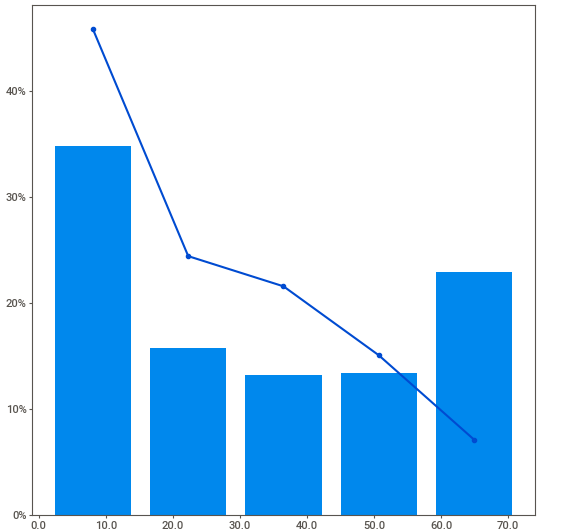
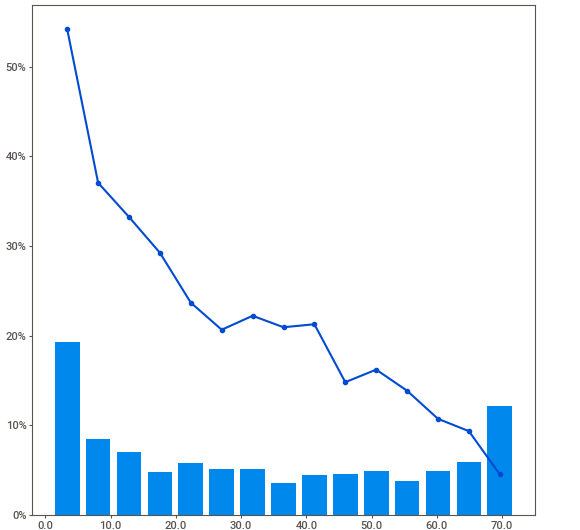
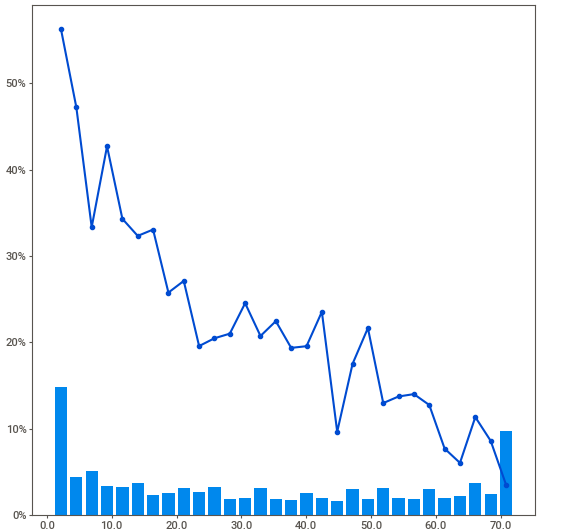
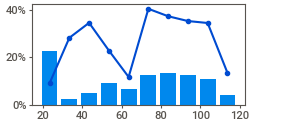
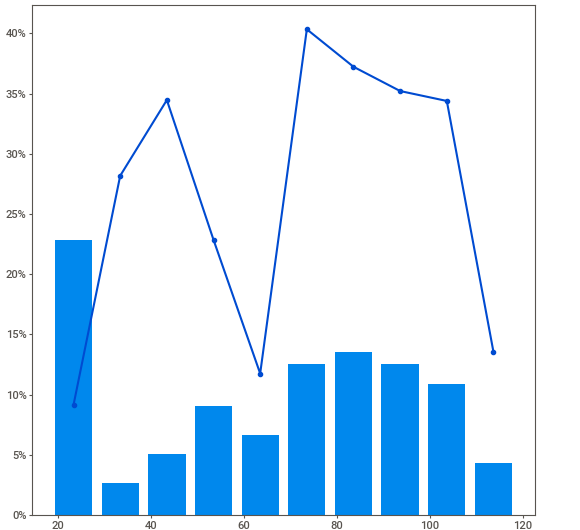
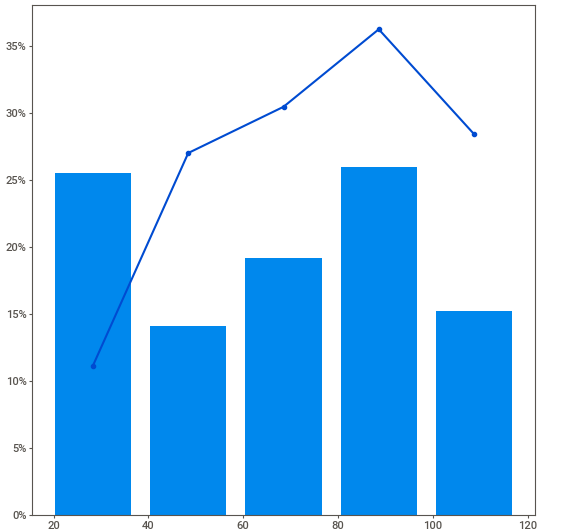
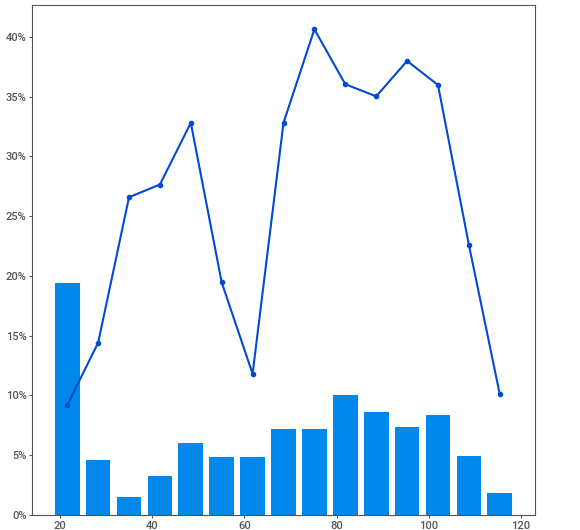
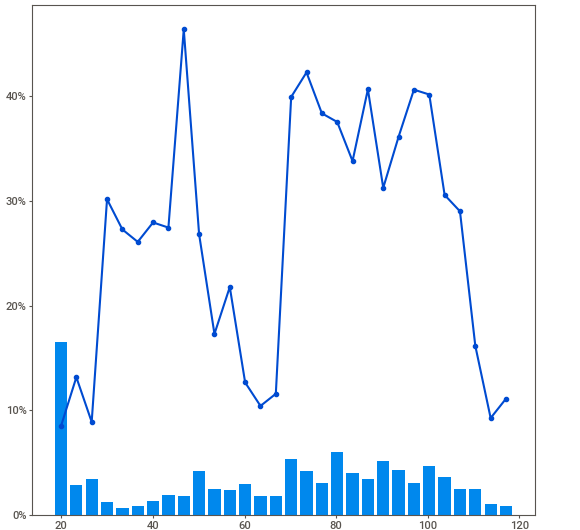
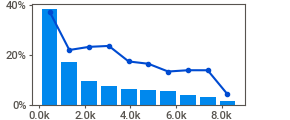
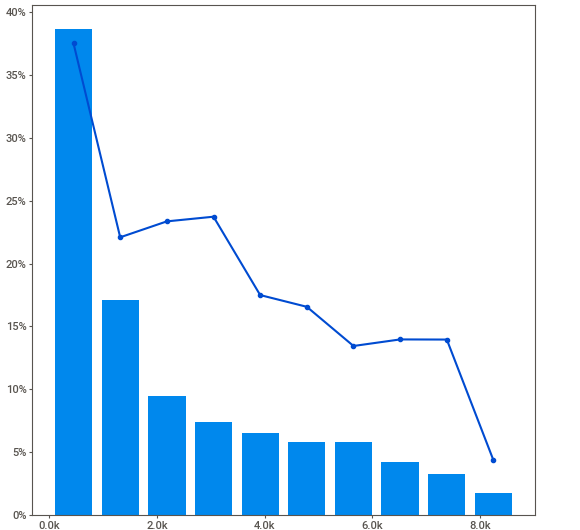
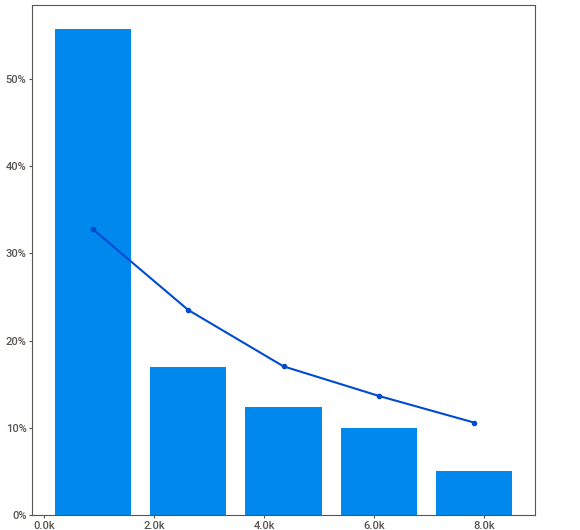
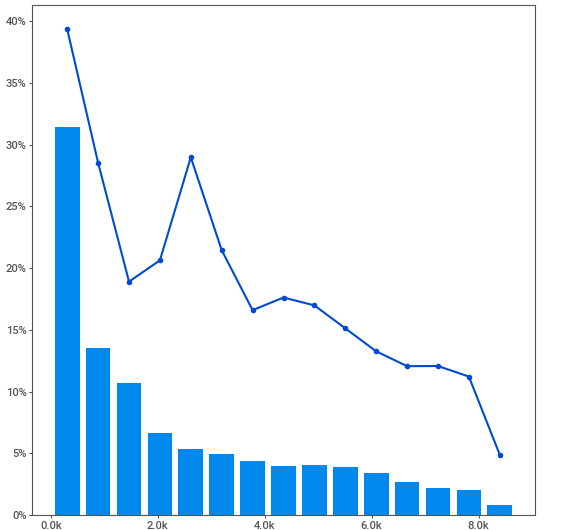
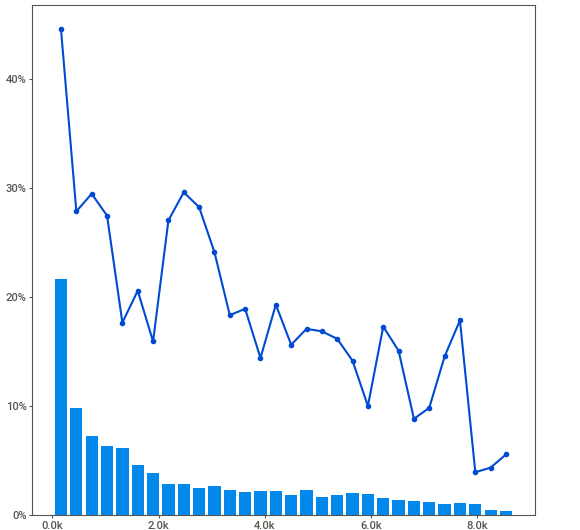
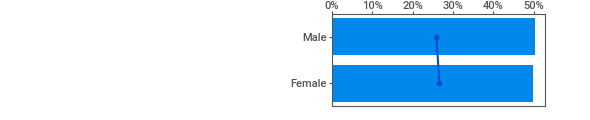
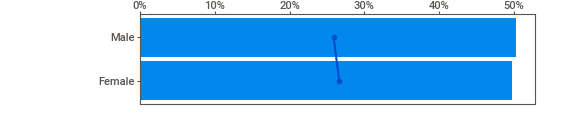
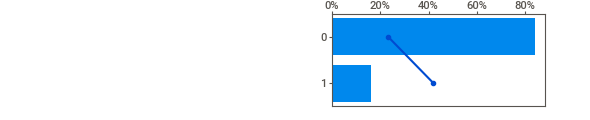
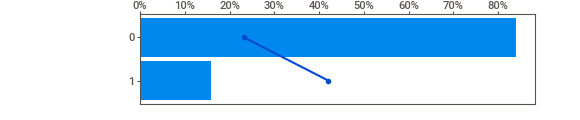
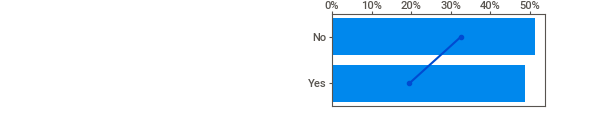
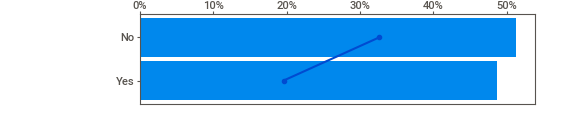
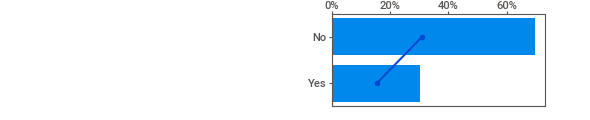
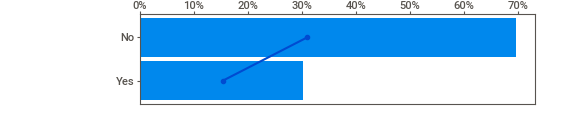
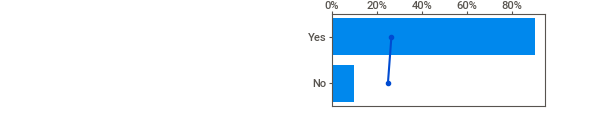
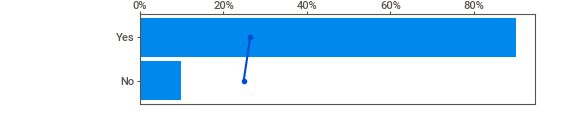
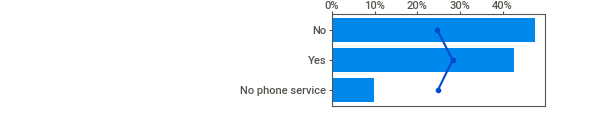
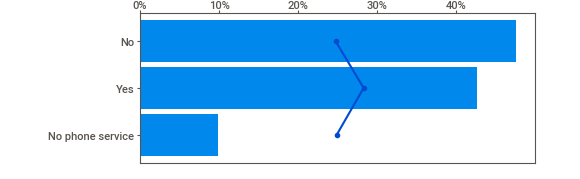
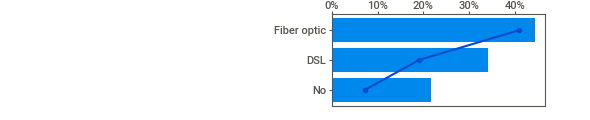
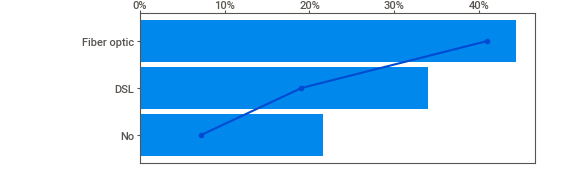
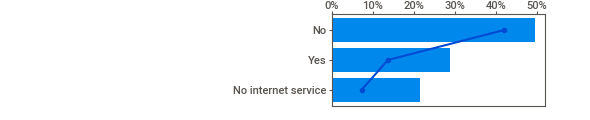
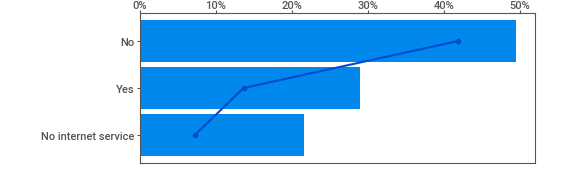
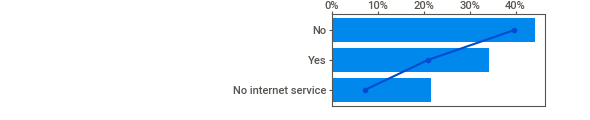
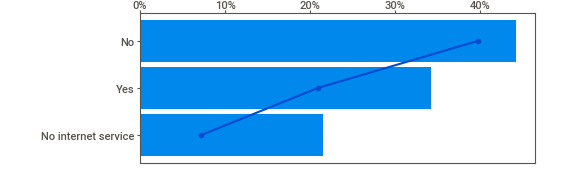
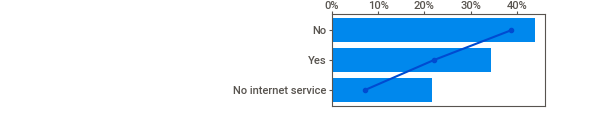
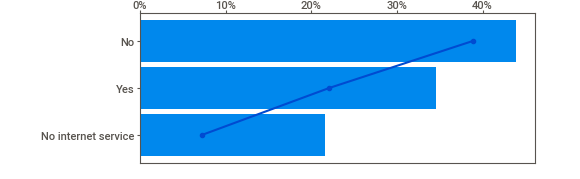
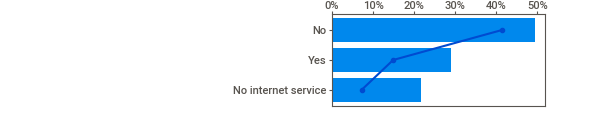
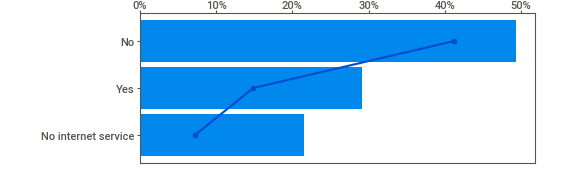
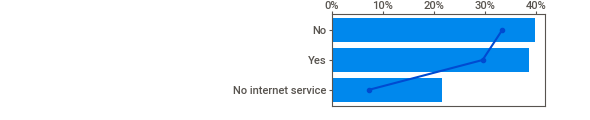
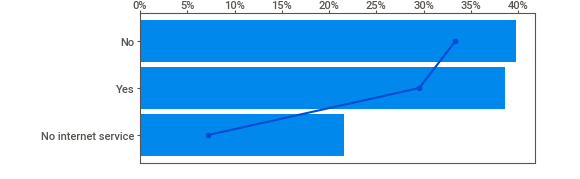
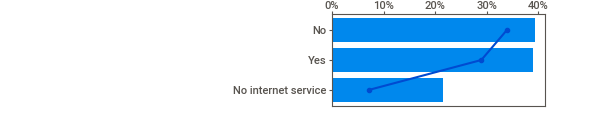
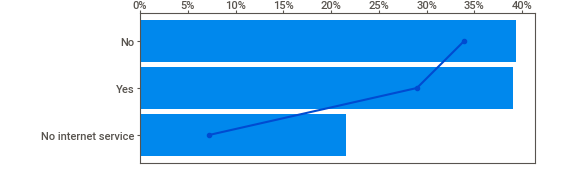
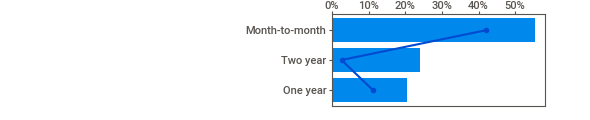
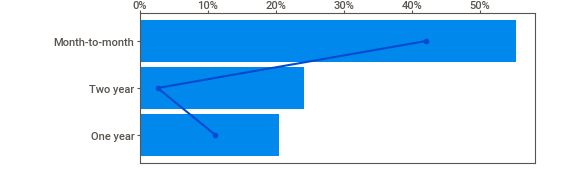
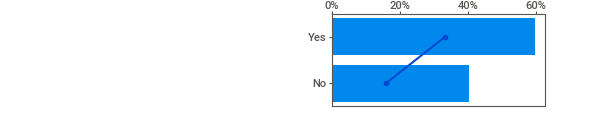
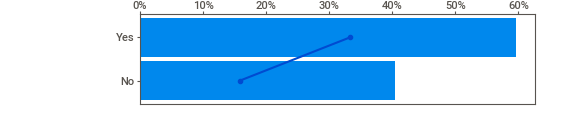
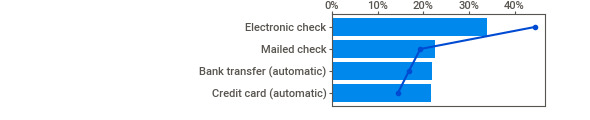
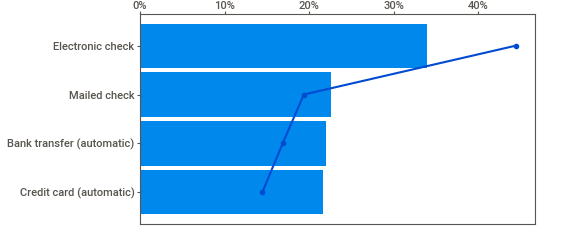
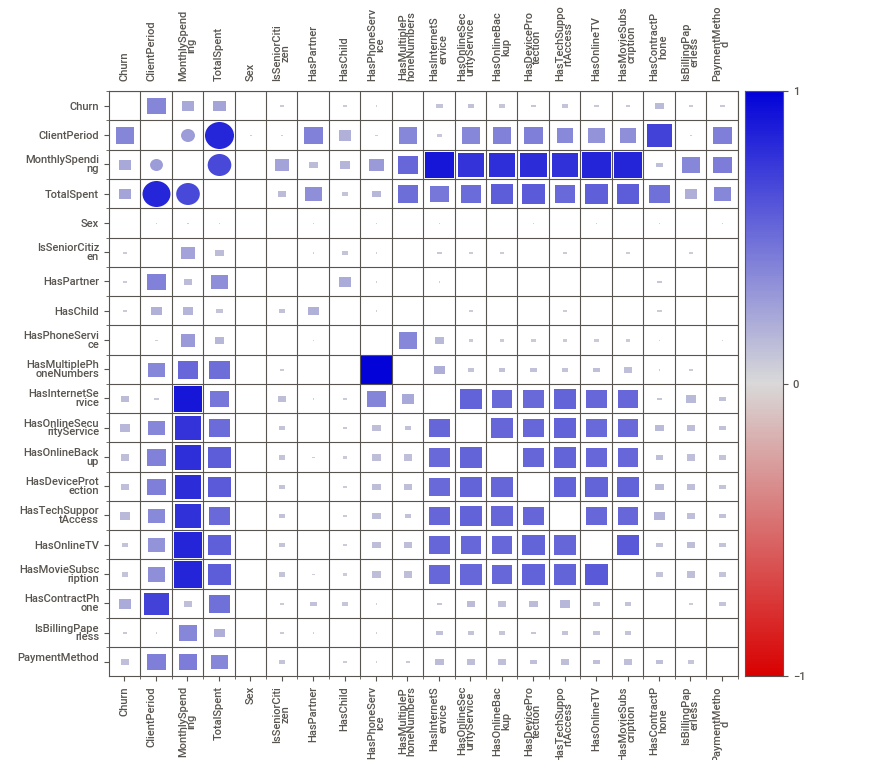
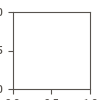

In [60]:
import sweetviz as sv

report = sv.analyze(data, 'Churn')
report.show_notebook()

В целом по выводу очень много можно узнать - очень мощный инструмент для быстрого анализа по разным плоскостям

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [61]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [100]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.2, random_state=42)

std = StandardScaler()
train = pd.DataFrame(std.fit_transform(X_train[num_cols]), columns=num_cols)
test = pd.DataFrame(std.transform(X_test[num_cols]), columns=num_cols)

model = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

transform = model.fit_transform(X_train[cat_cols])
one_hot_culture = pd.DataFrame(transform, columns=model.get_feature_names_out(cat_cols), index=X_train.index
                        )

transform = model.transform(X_test[cat_cols])
one_hot_culture_test = pd.DataFrame(transform, columns=model.get_feature_names_out(cat_cols), index=X_test.index
                        )

In [101]:
len(train), len(one_hot_culture)

(4218, 4218)

In [102]:
train.reset_index(drop=True, inplace=True)
one_hot_culture.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
one_hot_culture_test.reset_index(drop=True, inplace=True)

X_train = pd.concat([train, one_hot_culture], axis=1)

X_test = pd.concat([test, one_hot_culture_test], axis=1)

In [104]:
model = LogisticRegressionCV(
    Cs=[100, 10, 1, 0.1, 0.01, 0.001],
    scoring='roc_auc',
    refit=True,
    cv=5,  # 5-кратная кроссвалидация
    random_state=42
)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Лучший C:", model.C_)
print("ROC-AUC на валидационном наборе:", roc_auc)

Лучший C: [10.]
ROC-AUC на валидационном наборе: 0.843727294173154


Получили С=10 и в челом хорошее качество


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [106]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [107]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X_train, X_valid, y_train, y_valid = train_test_split(data[feature_cols], data[target_col], test_size=0.2, random_state=42)

model = CatBoostClassifier(cat_features=cat_cols, silent=True)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_pred_proba)

print("ROC-AUC с параметрами по умолчанию:", roc_auc)

ROC-AUC с параметрами по умолчанию: 0.8404411417787214


In [108]:
from sklearn.model_selection import ParameterGrid

# Определяем сетку параметров для тестирования
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Для хранения результатов
results = []

# Перебираем все комбинации параметров
for params in ParameterGrid(param_grid):
    model = CatBoostClassifier(cat_features=cat_cols,
                                iterations=params['iterations'],
                                learning_rate=params['learning_rate'],
                                silent=True)

    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_valid)[:, 1]
    roc_auc = roc_auc_score(y_valid, y_pred_proba)

    results.append({
        'iterations': params['iterations'],
        'learning_rate': params['learning_rate'],
        'roc_auc': roc_auc
    })

# Преобразуем результаты в DataFrame для удобства
results_df = pd.DataFrame(results)

# Находим лучшую комбинацию параметров
best_params = results_df.loc[results_df['roc_auc'].idxmax()]

print("Лучшие параметры:")
print(f"Iterations: {best_params['iterations']}, Learning Rate: {best_params['learning_rate']}, ROC-AUC: {best_params['roc_auc']}")

Лучшие параметры:
Iterations: 100.0, Learning Rate: 0.1, ROC-AUC: 0.8437320122670441


In [109]:
results_df

,iterations,learning_rate,roc_auc
0,100,0.01,0.827313
1,100,0.10,0.843732
2,100,0.20,0.843718
3,200,0.01,0.836129
4,200,0.10,0.838603
5,200,0.20,0.830219
6,300,0.01,0.837738
7,300,0.10,0.837164
8,300,0.20,0.826049


# Предсказания

In [112]:
best_model = CatBoostClassifier(cat_features=cat_cols,
                                iterations=100,
                                learning_rate=0.1,
                                silent=True)
best_model.fit(X_train, y_train)

In [113]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.